<a href="https://colab.research.google.com/github/yuhki777/practice/blob/main/9%E7%AB%A0_%E6%BD%9C%E5%9C%A8%E9%A1%A7%E5%AE%A2%E3%82%92%E6%8A%8A%E6%8F%A1%E3%81%99%E3%82%8B%E3%81%9F%E3%82%81%E3%81%AE%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%EF%BC%91%EF%BC%90%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/100knock-data_analytics/9章') #ここを変更。

# 9章 潜在顧客を把握するための画像認識１０本

ここでは、カメラから取得した映像を用いて画像認識を行い、  
必要な情報を取得するための流れを学ぶことで、  
画像認識をビジネス現場で応用するイメージをつかみます。

### ノック８１：画像データを読み込んでみよう

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("img/img01.jpg")
height, width = img.shape[:2]
print("画像幅:" + str(width))
print("画像高さ:" + str(height))

cv2_imshow(img)

### ノック８２：映像データを読み込んでみよう

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

cap = cv2.VideoCapture("mov/mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("画像幅:" + str(width))
print("画像高さ:" + str(height))
print("総フレーム数:" + str(count))
print("FPS:" + str(fps))

num = 0
num_frame = 100
list_frame = []
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    list_frame.append(frame_rgb)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
    if num>num_frame:
      break
  num = num + 1
print("処理を完了しました")
cap.release()

plt.figure()
patch = plt.imshow(list_frame[0])
plt.axis('off')
def animate(i):
  patch.set_data(list_frame[i])
anim = FuncAnimation(plt.gcf(), animate, frames=len(list_frame), interval=1000/30.0)
plt.close()

HTML(anim.to_jshtml())

### ノック８３：映像を画像に分割し、保存してみよう

In [ ]:
cap = cv2.VideoCapture("mov/mov01.avi")
num = 0
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        filepath = "snapshot/snapshot_" + str(num) + ".jpg"
        cv2.imwrite(filepath,frame)
    num = num + 1
    if num>=count:
        break
cap.release()
cv2.destroyAllWindows()

### ノック８４：画像内のどこに人がいるのかを検出してみよう

In [ ]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale':1.05, 'hitThreshold':0, 'groupThreshold':5}

img = cv2.imread("img/img01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
  for (x, y, w, h) in human:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)
cv2_imshow(img)
cv2.imwrite("temp.jpg", img)

### ノック８５：画像内の人の顔を検出してみよう

In [ ]:
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("img/img02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness = pen_w)

cv2_imshow(img)
cv2.imwrite("temp.jpg",img)

### ノック８６：画像内の人がどこに顔を向けているのかを検出してみよう

顔方位:0.06456096931747406 (角度:3.6990710631648662度)


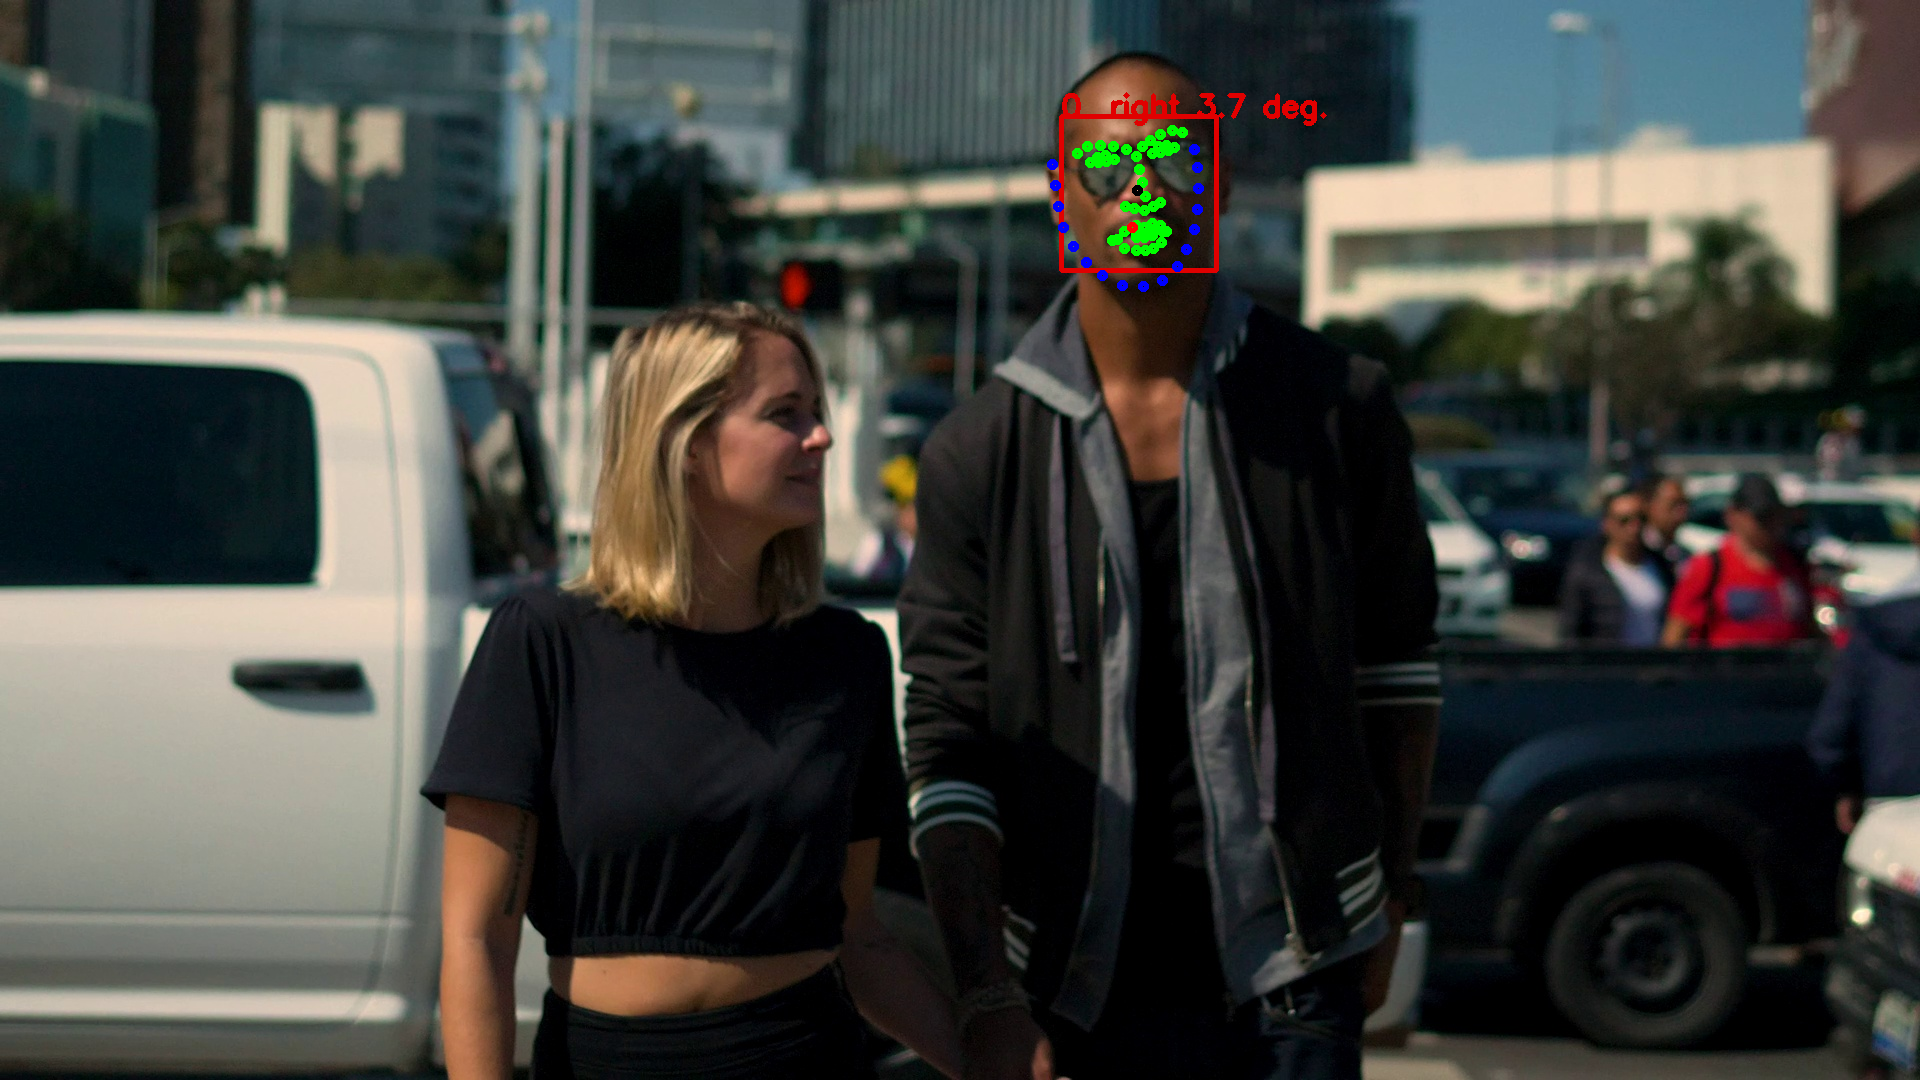

True

In [ ]:
import dlib
import math

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    color_f = (0, 0, 225)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        
        if shape_point_count<num_of_points_out:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in

    cv2.circle(img,(int(gx_out), int(gy_out)),circle_r,(0,0,255), line_w)
    cv2.circle(img,(int(gx_in), int(gy_in)),circle_r,(0,0,0), line_w)

    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("顔方位:{} (角度:{}度)".format(theta,radian))

    if radian<0:
        textPrefix = "   left "
    else:
        textPrefix = "   right "
    textShow = textPrefix + str(round(abs(radian),1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

cv2_imshow(img)
cv2.imwrite("temp.jpg",img)

### ノック８７：検出した情報を統合し、タイムラプスを作ってみよう

In [ ]:
print("タイムプラス生成を開始します")

cap = cv2.VideoCapture("mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogPArams = {'winStride': (8,8), 'padding': (32, 32), 'scale':1.05, 'hitThreshold':0, 'groupThreshold':5}

movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name,fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)

            video.write(frame)
    else:
        break
    num = num + 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成を終了しました")

タイムプラス生成を開始します
タイムラプス生成を終了しました


### ノック８８：全体像をグラフにして可視化してみよう

In [ ]:
import pandas as pd

print("分析を開始します")

cap = cv2.VideoCapture("mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

num = 0
list_df = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します
分析を終了しました


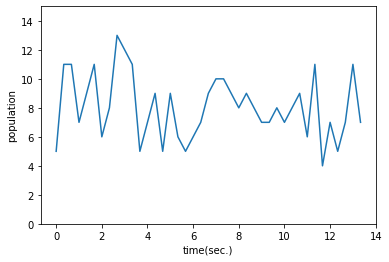

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック８９：人通りの変化をグラフで確認しよう

In [ ]:
print("分析を解析します")

cap = cv2.VideoCapture("mov/mov02.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride':(8, 8), 'padding': (32, 32), 'scale':1.05, 'hitThreshold':0,'groupThreshold':5}

num = 0
list_df2 = pd.DataFrame(columns=['time', 'people'])
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    if (num%10==0):
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      human, r = hog.detectMultiScale(gray, **hogParams)
      if(len(human)>0):
        for (x, y, w, h) in human:
          cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255),3)
      tmp_se = pd.Series( [num/fps, len(human)], index=list_df.columns)
      list_df2 = list_df2.append(tmp_se, ignore_index=True)
      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  else:
    break
  num = num +1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")


分析を解析します
分析を終了しました


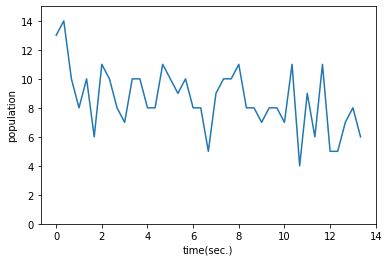

In [ ]:
plt.plot(list_df2["time"], list_df2["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック９０：移動平均を計算することでノイズの影響を除去しよう

In [ ]:
import numpy as np
def moving_average(x,y):
  y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid')
  x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
  return x_dat, y_conv

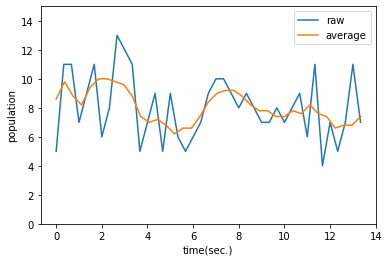

In [ ]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

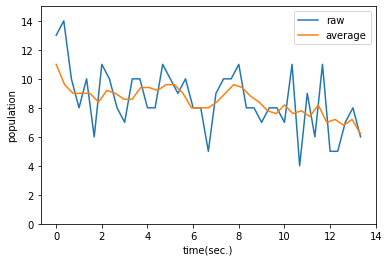

In [ ]:
plt.plot(list_df2["time"], list_df2["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df2["time"], list_df2["people"])
plt.plot(ma_x2,ma_y2, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

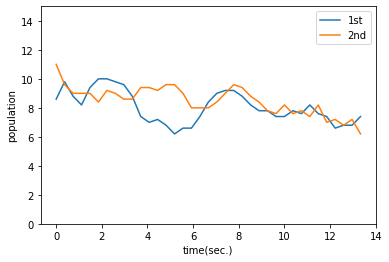

In [ ]:
plt.plot(ma_x,ma_y, label="1st")
plt.plot(ma_x2,ma_y2, label="2nd")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()